In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le=LabelEncoder()

In [6]:
df["Species"]=le.fit_transform(df["Species"])

In [7]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [8]:
X= df.drop('Species',axis=1)
Y=df["Species"]

In [9]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [10]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
m=GaussianNB()

In [15]:
m.fit(X_train,Y_train)

GaussianNB()

In [16]:
Y_pred=m.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [18]:
accuracy=accuracy_score(Y_test,Y_pred)

In [19]:
accuracy

1.0

In [20]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]], dtype=int64)

<Axes: >

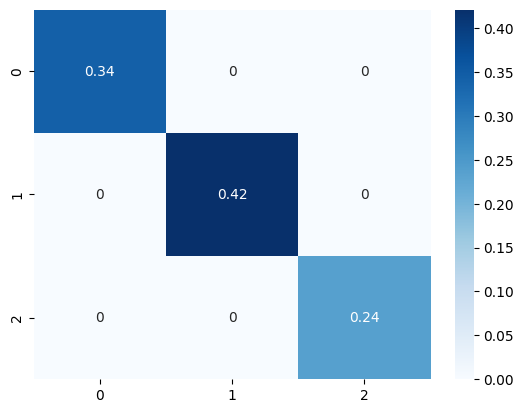

In [21]:
sns.heatmap(cm/np.sum(cm), annot=True,cmap="Blues")

In [22]:
def eval(cm, c):
    row_sum=np.sum(cm, axis=0)
    col_sum=np.sum(cm, axis=1)
    
    TP=cm[c][c]
    FP=col_sum[c]-cm[c][c]
    FN=row_sum[c]-cm[c][c]
    TN=np.sum(cm)-TP-FN-FP
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    return TP, FP, FN, TN, precision, recall,accuracy

In [23]:
TP_Setosa, FP_Setosa, FN_Setosa, TN_Setosa, precision_Setosa, recall_Setosa ,accuracy_setosa= eval(cm, 0)

In [24]:
print("For Class Setosa")
print("TP : ", TP_Setosa)
print("FP : ", FP_Setosa)
print("FN : ", FN_Setosa)
print("TN : ", TN_Setosa)
print("Precision : ", precision_Setosa)
print("Recall : ", recall_Setosa)
print("Accuarcy : ", accuracy_setosa)

For Class Setosa
TP :  13
FP :  0
FN :  0
TN :  25
Precision :  1.0
Recall :  1.0
Accuarcy :  1.0
